# **PROJECT - (2nd April, 2021 - 18th April, 2021)**

# **1. PART ONE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
project_path = '/content/drive/MyDrive/My Files/AIML Workbooks'

In [ ]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
import tensorflow as tf     # Importing library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn import svm              # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing               # Importing preprocessing library 

from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model               # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten, ZeroPadding2D, UpSampling2D, Reshape, SpatialDropout2D, Concatenate      # Importing necessary libraries 
from tensorflow.keras.applications.mobilenet import preprocess_input           # Importing for model building
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau            # Importing for model building 
from tensorflow.keras.applications.mobilenet import MobileNet       # Importing for model building 
from tensorflow.keras.losses import binary_crossentropy             # Importing for model building
from tensorflow.keras.backend import log, epsilon          # Importing necessary library for model building 
from keras.utils import np_utils     # Importing necessary library
from sklearn import svm              # Importing necessary library for model building
from sklearn.svm import SVC          # Import svc library for model building

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array            # Loading image generator 
from keras.preprocessing import image           # Importing necessary image library
from tensorflow import keras         # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD          # Importing optimizer library
import cv2                  # Importing necessary library
from PIL import ImageFile            # Importing image library
from tqdm import tqdm                # Importing necessary library
import time                 # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid              # Importing necessary image library
from PIL import Image       # Importing image library

import re                   # Importing regular expression library 
import nltk                 # Import necessary library 
from nltk.corpus import stopwords               # Importing necessary library 
from sklearn.feature_extraction.text import CountVectorizer          # Importing count library 
from sklearn.preprocessing import MultiLabelBinarizer      # Imorting necessary library 

In [ ]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **1. Import and analyse the data set.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Files/AIML Workbooks/blogtext.csv')

In [ ]:
df.shape

(681284, 7)

In [ ]:
df.size

4768988

In [ ]:
df.sample(10)         # Checking if the dataset is loaded properly

,id,gender,age,topic,sign,date,text
613968,3568208,female,14,Student,Leo,"08,July,2004",sigh soooo sad skool just sta...
61224,3881543,male,24,Military,Gemini,"14,July,2004",I had a terrible dream yesterday. W...
6601,883178,male,36,Fashion,Aries,"13,November,2002","As some of you know, my girlfriend ..."
486646,4164598,male,16,indUnk,Scorpio,"12,August,2004",Today is the first time in c math lec.. it ...
234953,1021779,female,25,indUnk,Scorpio,"29,January,2004","Getting back to my trip play-by-play, here'..."
378654,2268074,male,47,BusinessServices,Leo,"24,February,2004",urlLink Banned Books Week Tohti Tunya...
415384,3744749,male,17,Student,Aquarius,"12,July,2004",Noize:'Intergalactic Planetary' Beastie...
198090,1472995,female,27,indUnk,Aries,"11,September,2003",Dear Ndugu - Wow...amazing what...
446141,3857809,male,25,Government,Gemini,"03,August,2004","Well, our first page was posted. urlL..."
396721,3546623,female,42,indUnk,Libra,"04,June,2004","With in and With out Dark and gloomy, Onc..."


In [ ]:
df.isna().any()          # Checking for any null values in the dataset

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [ ]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [ ]:
df.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [ ]:
# As the dataset is large we are using fewer rows, inorder to run compatibly with the machine so as to avoid crashing (100000)

df_new = pd.read_csv('/content/drive/MyDrive/My Files/AIML Workbooks/blogtext.csv', nrows = 100000)

In [ ]:
df_new.sample(10)         # Checking if the dataset is loaded properly

,id,gender,age,topic,sign,date,text
67380,2134154,male,16,Arts,Taurus,"19,April,2004",If you are not already watching Alias a...
23519,299143,female,23,Engineering,Cancer,"07,June,2002",Hmm...archives aren't working...
61108,3423289,female,23,Arts,Leo,"28,May,2004",Here is part of a nice email...
73668,1570719,male,26,Education,Libra,"01,August,2004",God I hope this doesn’t come out ...
54874,3712172,male,17,Student,Pisces,"23,June,2004",Hey everybody! Got to bed ...
94796,3492238,female,17,Student,Aries,"11,June,2004",1. Don't drink grape juice while we...
87530,171019,female,23,Education,Leo,"21,January,2004",damn it... AT&T turned off my cell...
19172,2565326,male,48,Communications-Media,Aries,"05,May,2004",urlLink Nice day..&nbsp; urlLink
26187,1939766,female,23,Arts,Aquarius,"12,August,2004",I haven't been watching Cribs lat...
4463,766556,female,34,indUnk,Sagittarius,"02,July,2003",Worst comb-over ever Last night I saw...


In [ ]:
df_new.size

700000

In [ ]:
df_new.shape

(100000, 7)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [ ]:
df_new.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

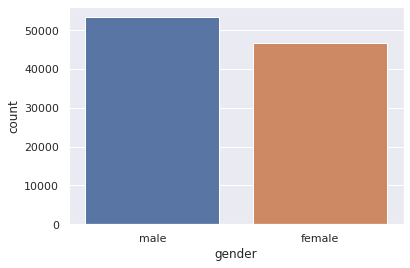

In [ ]:
sns.countplot(x = 'gender', data = df_new)

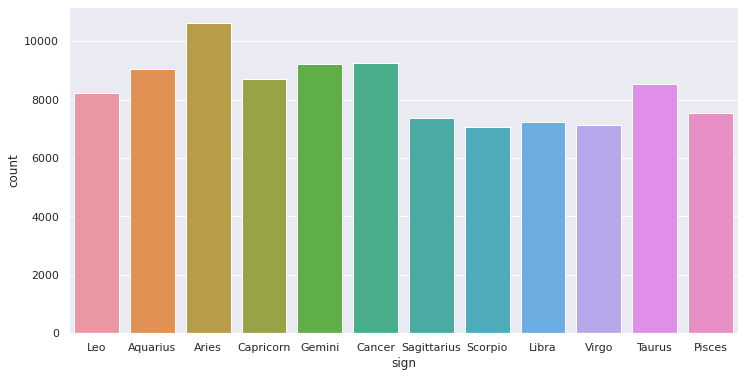

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sign', data = df_new);

## **2. Perform data pre-processing on the data**


### Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

In [ ]:
# Remove unwanted chars other than alphanumeric

pattern = "[^\w]"
df_new.text = df_new.text.apply(lambda s : re.sub(pattern,' ',s))

In [ ]:
df_new.sample(5)

,id,gender,age,topic,sign,date,text
93407,324114,female,46,Consulting,Capricorn,"19,May,2002",urlLink I don t know about...
52173,3718134,male,25,Arts,Scorpio,"08,June,2003",Why is there such resistance out th...
45621,2002478,male,25,Science,Sagittarius,"19,March,2004",Welcome readers old and new Hello Ada...
10790,4004267,male,33,LawEnforcement-Security,Taurus,"10,August,2004",When I am Old I shall wear Turquois...
53644,899153,female,27,Religion,Gemini,"16,December,2002",lay me down in sheets of linen you h...


In [ ]:
# Coverting text to lowercase

df_new.text = df_new.text.apply(lambda s : s.lower())

In [ ]:
df_new.sample(10)

,id,gender,age,topic,sign,date,text
3618,589736,male,35,Technology,Aries,"05,August,2004",from ebert films like the ch...
39155,4002052,female,23,Education,Capricorn,"08,August,2004",urllink alyson wong p...
6575,883178,male,36,Fashion,Aries,"18,November,2002",that s a funny question because of...
1685,589736,male,35,Technology,Aries,"05,August,2004",i know the feeling you are going th...
15039,4036173,female,24,Arts,Sagittarius,"25,July,2004",this is my very first blog post ...
14915,727002,male,23,Internet,Leo,"12,December,2003",so i m taking next friday off gi...
72629,2349682,female,24,Education,Aquarius,"12,May,2004",today i had lunch with my gra...
50910,3986440,male,23,Marketing,Leo,"03,August,2004",poker has been good to me so far with...
13559,1976124,male,25,indUnk,Libra,"24,April,2004",work work work ugh
3813,3543234,male,14,indUnk,Scorpio,"13,June,2004",do not try to bend the spoon becau...


In [ ]:
# Removing unwanted spaces

df_new.text = df_new.text.apply(lambda s : s.strip())

In [ ]:
df_new.sample(10)

,id,gender,age,topic,sign,date,text
59157,2163386,male,26,Government,Taurus,"18,April,2004",tomorrow i m going to make an appointment with...
36792,152151,female,23,Engineering,Libra,"19,March,2001",i was talking to some friends yesterday and we...
56471,2217862,female,42,indUnk,Scorpio,"16,June,2004",urllink this is one of my favourite places ...
38946,3955165,female,23,indUnk,Sagittarius,"16,August,2004",whitey houston and vertical struts side trac...
96083,4000026,male,17,Education,Gemini,"27,July,2004",it was just awesome today 5 maths period free...
95666,751202,female,33,Internet,Gemini,"24,July,2003",ah lazy dayz i ve done nowt today i ve ...
42769,3326689,male,14,indUnk,Cancer,"12,May,2004",june 2 2004 at jagex we take a great pride i...
24790,546850,male,24,indUnk,Aries,"27,February,2003",the tides of war the ides of march i recall...
81278,3899528,male,16,indUnk,Scorpio,"31,July,2004",i seal my tots in de clouds it floats across...
3232,589736,male,35,Technology,Aries,"05,August,2004",pentagon holding terror drill top pentagon ...


In [ ]:
# Removing stopwords

stopwords = set(stopwords.words('english'))

In [ ]:
df_new.text  = df_new.text.apply(lambda t : ' '. join([words for words in t.split() if words not in stopwords]))

In [ ]:
df_new.sample(10)

,id,gender,age,topic,sign,date,text
64515,1852920,female,25,indUnk,Sagittarius,"18,May,2004",computer wants repress feelings poured heart y...
39350,3672856,male,16,Student,Scorpio,"26,July,2004",yup braces im free man look better though dont...
77159,2529236,male,24,indUnk,Cancer,"08,July,2004",yesterday tom ridge reminded us osama bin lade...
81913,1903669,female,14,Non-Profit,Aquarius,"06,November,2003",
70915,3358192,female,16,indUnk,Aries,"16,May,2004",mood bored ah yes found blogger thanks lovely ...
5399,1103575,female,17,indUnk,Scorpio,"14,July,2004",sigh bored already oh well st robert kids make...
88525,320317,male,36,Technology,Pisces,"15,October,2002",cable operators like brag revolutionized tv ke...
99826,3446810,female,17,Communications-Media,Scorpio,"28,June,2004",know nobody give kind guarantee think want som...
70868,3640328,female,45,Arts,Scorpio,"12,July,2004",rooting mail found nifty catalog really expens...
93528,324114,female,46,Consulting,Capricorn,"01,November,2002",weekend gonna give urllink haloscan try commen...


In [ ]:
# Dropping id and date columns in the dataset

df_new.drop(labels = ['id', 'date'], axis = 1, inplace = True)

In [ ]:
df_new.sample(10)

,gender,age,topic,sign,text
50089,male,27,Government,Sagittarius,urllink plane boeing 777 flew go england nice ...
11533,female,27,Publishing,Scorpio,hello dearest beautiful gal frens nbsp blog la...
82133,male,26,Technology,Scorpio,unsurprisingly berg execution made much impact...
11287,male,23,Engineering,Aquarius,urllink super prefix means upon superior size ...
22279,female,27,indUnk,Gemini,men desire virgin whore edward dahlberg died y...
9206,female,24,indUnk,Sagittarius,urllink las meninas velasquez el prado madrid
64417,female,23,Chemicals,Capricorn,dinner one arab street food stores tks treatin...
29085,female,33,Internet,Taurus,kind like answering silly quiz questions know ...
47721,female,17,Student,Capricorn,think jo still comes well fuck feels like dat ...
20766,male,16,indUnk,Leo,man bored high schools sucks got work actually...


### Target/label merger and transformation

In [ ]:
df_new['labels'] = df_new.apply(lambda col : [col['gender'], col['age'], col['topic'], col['sign']], axis = 1)

In [ ]:
# Drop gender,age,topic & sign as they are already merged to labels column

df_new.drop(columns = ['gender','age','topic','sign'], axis = 1, inplace = True)

In [ ]:
df_new.sample(10)

,text,labels
9134,came one house dance light feet kiss fingers l...,"[female, 24, indUnk, Sagittarius]"
95980,went last night sister drinks search man amazi...,"[female, 25, Student, Taurus]"
88660,idc reports pc shipments worldwide grew 1 5 20...,"[male, 36, Technology, Pisces]"
20112,okay month officially lost twice lost seoul am...,"[female, 27, Education, Cancer]"
35994,okay woke really late morning usually means ti...,"[female, 16, Student, Sagittarius]"
41996,happy 6th birthday andrew show great got odeon...,"[female, 24, indUnk, Libra]"
22418,well would seem everyone go ben lately well we...,"[male, 17, Student, Cancer]"
99894,jeevan ke har mod par mil jaate hain humsafar ...,"[female, 27, Advertising, Aquarius]"
29525,merciful lord blinded horror honestly think tr...,"[female, 27, Government, Leo]"
37615,safely contained illusive sactuary fragile wal...,"[male, 36, Arts, Virgo]"


## Train and test split

In [ ]:
x = df_new.text
y = df_new.labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)        # Splitting data into training and testing set

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80000,)
(80000,)
(20000,)
(20000,)


In [ ]:
x_train

78689    talking gal online chatted asked see pic showe...
76423    hey everybody started another painting yesterd...
86945    possibly need burn 2 ladders quote day power m...
57427    heart red urllink color heart brought urllink ...
34616    anything today woke 2pm hehehe made one ramen ...
                               ...                        
50057    method post urllink wild animal name username ...
98047    days rose bloom really like macro function nev...
5192     today dies cinerum lovely latin tells mean lit...
77708    awesome create blog keep posting choose templa...
98539    attention hamptons shoppers hottest talked wri...
Name: text, Length: 80000, dtype: object

In [ ]:
x_test

43660    urllink information literacy wikipedia new art...
87278    sorry reading town day get practice make voice...
14317    happy birthday dad well huge news everyone goi...
81932    bothered wake 6 00 morning watch world idol re...
95321    artist beatles album let song let lennon mccar...
                               ...                        
73441    welcome course contrary title post means begin...
1341     weird feelings everything gonna talk 1 cuz one...
71987    birthday means drinking tonight dude pretty di...
26910    read lyle blog could say chance man desperate ...
24890    sin one ring hit today tolkien description one...
Name: text, Length: 20000, dtype: object

## Vectorisation, etc.

In [ ]:
convec = CountVectorizer(ngram_range=(1,2))

In [ ]:
# Feed data into CountVectorizer
convec.fit(x_train)

# Check vocabulary size 
len(convec.vocabulary_)

4262296

In [ ]:
convec.get_feature_names()

['00',
 '00 00',
 '00 000',
 '00 00a',
 '00 00am',
 '00 01',
 '00 03',
 '00 04',
 '00 05',
 '00 07',
 '00 08',
 '00 0800',
 '00 09',
 '00 10',
 '00 11',
 '00 12',
 '00 120',
 '00 15',
 '00 17',
 '00 18',
 '00 20',
 '00 2004',
 '00 21',
 '00 23',
 '00 27',
 '00 28',
 '00 29',
 '00 2nd',
 '00 30',
 '00 300',
 '00 30am',
 '00 30ish',
 '00 30pm',
 '00 31st',
 '00 32',
 '00 34',
 '00 35',
 '00 36',
 '00 39',
 '00 40',
 '00 400',
 '00 41',
 '00 42',
 '00 44',
 '00 45',
 '00 47',
 '00 50',
 '00 500',
 '00 55',
 '00 56',
 '00 57',
 '00 59',
 '00 6lbs',
 '00 780',
 '00 81',
 '00 90',
 '00 96',
 '00 able',
 '00 according',
 '00 actually',
 '00 adelphi',
 '00 admission',
 '00 admit',
 '00 adwords',
 '00 afi',
 '00 afternoon',
 '00 ahead',
 '00 ahh',
 '00 airfare',
 '00 alarm',
 '00 alll',
 '00 allrite',
 '00 almost',
 '00 already',
 '00 alright',
 '00 also',
 '00 although',
 '00 american',
 '00 andwe',
 '00 another',
 '00 anymore',
 '00 anyone',
 '00 anytime',
 '00 anyway',
 '00 apple',
 '00 appo

In [ ]:
x_train_trans = convec.transform(x_train)

In [ ]:
type(x_train_trans)

scipy.sparse.csr.csr_matrix

In [ ]:
x_train_trans

<80000x4262296 sparse matrix of type '<class 'numpy.int64'>'
	with 13669695 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_trans[0]

<1x4262296 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_trans = convec.transform(x_test)

In [ ]:
x_test_trans

<20000x4262296 sparse matrix of type '<class 'numpy.int64'>'
	with 2555765 stored elements in Compressed Sparse Row format>

In [ ]:
convec.get_feature_names()[:10]

['00',
 '00 00',
 '00 000',
 '00 00a',
 '00 00am',
 '00 01',
 '00 03',
 '00 04',
 '00 05',
 '00 07']

In [ ]:
print(x_train_trans)

  (0, 280126)	1
  (0, 281571)	1
  (0, 656747)	1
  (0, 656764)	1
  (0, 767770)	1
  (0, 769071)	1
  (0, 1481476)	1
  (0, 1481650)	1
  (0, 1545997)	1
  (0, 1550942)	1
  (0, 1798724)	1
  (0, 2097555)	1
  (0, 2100025)	1
  (0, 2512992)	1
  (0, 2514598)	1
  (0, 2627012)	1
  (0, 2628742)	1
  (0, 2638718)	1
  (0, 2638926)	1
  (0, 2781087)	1
  (0, 2781417)	1
  (0, 2927984)	1
  (0, 2928046)	1
  (0, 3199369)	1
  (0, 3202000)	1
  :	:
  (79999, 3425683)	1
  (79999, 3548988)	1
  (79999, 3549426)	1
  (79999, 3559880)	1
  (79999, 3560675)	1
  (79999, 3570390)	1
  (79999, 3570430)	1
  (79999, 3618805)	1
  (79999, 3618823)	1
  (79999, 3622576)	1
  (79999, 3622581)	1
  (79999, 3661457)	1
  (79999, 3662790)	1
  (79999, 3853798)	1
  (79999, 3853811)	1
  (79999, 3891594)	1
  (79999, 3891611)	1
  (79999, 3905006)	1
  (79999, 3905007)	1
  (79999, 4002832)	1
  (79999, 4002834)	1
  (79999, 4200082)	1
  (79999, 4200688)	1
  (79999, 4206128)	1
  (79999, 4206297)	1


In [ ]:
print(x_test_trans)

  (0, 27426)	1
  (0, 79796)	1
  (0, 80057)	1
  (0, 80555)	1
  (0, 81375)	1
  (0, 115114)	1
  (0, 142985)	1
  (0, 152758)	1
  (0, 152824)	1
  (0, 180482)	1
  (0, 181152)	1
  (0, 192557)	1
  (0, 193171)	1
  (0, 225481)	1
  (0, 226359)	1
  (0, 246204)	1
  (0, 271835)	3
  (0, 271883)	1
  (0, 272842)	1
  (0, 272879)	1
  (0, 290370)	1
  (0, 290382)	1
  (0, 355658)	1
  (0, 364270)	1
  (0, 646905)	2
  :	:
  (19999, 3733388)	1
  (19999, 3782530)	1
  (19999, 3787033)	1
  (19999, 3794952)	1
  (19999, 3808100)	1
  (19999, 3869260)	1
  (19999, 3873946)	1
  (19999, 3874156)	1
  (19999, 3910739)	1
  (19999, 3910831)	1
  (19999, 3914798)	1
  (19999, 3915766)	1
  (19999, 3938744)	2
  (19999, 3939435)	1
  (19999, 3957383)	1
  (19999, 3959374)	1
  (19999, 3969746)	1
  (19999, 3995987)	1
  (19999, 4035852)	2
  (19999, 4037932)	1
  (19999, 4037993)	1
  (19999, 4047826)	1
  (19999, 4115742)	1
  (19999, 4152425)	1
  (19999, 4153320)	1


In [ ]:
label_counts=dict()

for labels in df_new.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label.

In [ ]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Military': 798,
 'Museums-Libraries': 308,
 'Non-Profit': 1326,
 'Pisces'

## Transform the labels

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. 

In [ ]:
binarizer = MultiLabelBinarizer(classes = sorted(label_counts.keys()))

In [ ]:
y_train = binarizer.fit_transform(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) [13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48] will be ignored
  .format(sorted(unknown, key=str)))


In [ ]:
y_test = binarizer.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) [13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48] will be ignored
  .format(sorted(unknown, key=str)))


In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

## **3. Design, train, tune and test the best text classifier.**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', max_iter = 500000)
model = OneVsRestClassifier(model)
model.fit(x_train_trans, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 6 is present in all training example

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=500000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
ypred = model.predict(x_test_trans)

In [ ]:
ypred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

## **Micro-average method :**

you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them to get the statistics.

## **Macro-average Method :**
The method is straight forward. Just take the average of the precision and recall of the system on different sets

In [ ]:
def display_metrics_micro(y_test, ypred):
    print('Accuracy score: ', accuracy_score(y_test, ypred))
    print('F1 score: Micro', f1_score(y_test, ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(y_test, ypred, average='micro'))
    print('Average recall score: Micro', recall_score(y_test, ypred, average='micro'))
    
    
def display_metrics_macro(y_test, ypred):
    print('Accuracy score: ', accuracy_score(y_test, ypred))
    print('F1 score: Macro', f1_score(y_test, ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(y_test, ypred, average='macro'))
    
def display_metrics_weighted(y_test, ypred):
    print('Accuracy score: ', accuracy_score(y_test, ypred))
    print('F1 score: weighted', f1_score(y_test, ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(y_test, ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(y_test, ypred, average='weighted'))

In [ ]:
display_metrics_micro(y_test, ypred)

Accuracy score:  0.1164
F1 score: Micro 0.4817371003751176
Average precision score: Micro 0.2908289227811419
Average recall score: Micro 0.35423333333333334


In [ ]:
display_metrics_macro(y_test, ypred)

Accuracy score:  0.1164
F1 score: Macro 0.1678094304601543
Average recall score: MAcro 0.1117599498017056


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
display_metrics_weighted(y_test, ypred)

Accuracy score:  0.1164
F1 score: weighted 0.4448969920386379


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score: weighted 0.39193212328684823
Average recall score: weighted 0.35423333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **5. Print the true vs predicted labels for any 5 entries from the dataset.**

In [ ]:
preds = ypred[:15]
actuals = y_test[:15]

In [ ]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aquarius', 'Education', 'male'),
 ('Pisces', 'Student', 'male'),
 ('Pisces', 'female', 'indUnk'),
 ('Aquarius', 'Non-Profit', 'female'),
 ('Arts', 'Cancer', 'male'),
 ('Scorpio', 'female', 'indUnk'),
 ('Cancer', 'Student', 'male'),
 ('Gemini', 'indUnk', 'male'),
 ('Scorpio', 'Technology', 'male'),
 ('Cancer', 'indUnk', 'male'),
 ('Pisces', 'Technology', 'male'),
 ('Gemini', 'Student', 'female'),
 ('Student', 'Virgo', 'male'),
 ('Cancer', 'indUnk', 'male'),
 ('Libra', 'female', 'indUnk')]

In [ ]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[('Aquarius', 'Education', 'male'),
 ('male',),
 ('male',),
 (),
 ('Non-Profit', 'male'),
 (),
 (),
 ('Internet', 'Leo', 'male'),
 ('male',),
 ('Scorpio', 'Student', 'male'),
 (),
 ('male',),
 ('Student', 'Virgo'),
 ('male',),
 ()]

In [ ]:
print(binarizer.inverse_transform(ypred)[100])
print(binarizer.inverse_transform(y_test)[100])

('Student', 'female')
('Capricorn', 'Student', 'female')


In [ ]:
print(binarizer.inverse_transform(ypred)[250])
print(binarizer.inverse_transform(y_test)[250])

('Pisces', 'female', 'indUnk')
('Pisces', 'female', 'indUnk')


In [ ]:
print(binarizer.inverse_transform(ypred)[75])
print(binarizer.inverse_transform(y_test)[75])

('Scorpio', 'Technology', 'male')
('Sagittarius', 'Technology', 'male')


In [ ]:
print(binarizer.inverse_transform(ypred)[299])
print(binarizer.inverse_transform(y_test)[299])

('Aquarius', 'indUnk', 'male')
('Aquarius', 'indUnk', 'male')


In [ ]:
print(binarizer.inverse_transform(ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('Aquarius', 'Marketing', 'female')
('Aquarius', 'Marketing', 'female')


In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[1606, 9886, 3194, 10883, 17913]
('indUnk', 'male')
('Gemini', 'Student', 'female')
('male',)
('Aries', 'Education', 'male')
('male',)
('Leo', 'female', 'indUnk')
('male',)
('Libra', 'Technology', 'male')
('male',)
('Scorpio', 'Student', 'male')


In [ ]:
ypred_inversed = binarizer.inverse_transform(ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        x_test_trans[i],
        ','.join(y_test_inversed[i]),
        ','.join(ypred_inversed[i])
    ))

Text:	  (0, 27426)	1
  (0, 79796)	1
  (0, 80057)	1
  (0, 80555)	1
  (0, 81375)	1
  (0, 115114)	1
  (0, 142985)	1
  (0, 152758)	1
  (0, 152824)	1
  (0, 180482)	1
  (0, 181152)	1
  (0, 192557)	1
  (0, 193171)	1
  (0, 225481)	1
  (0, 226359)	1
  (0, 246204)	1
  (0, 271835)	3
  (0, 271883)	1
  (0, 272842)	1
  (0, 272879)	1
  (0, 290370)	1
  (0, 290382)	1
  (0, 355658)	1
  (0, 364270)	1
  (0, 646905)	2
  :	:
  (0, 3463105)	1
  (0, 3528636)	1
  (0, 3702692)	1
  (0, 3703054)	1
  (0, 3734817)	1
  (0, 3737387)	1
  (0, 3771284)	1
  (0, 3771578)	1
  (0, 3822062)	1
  (0, 3822413)	1
  (0, 3944259)	2
  (0, 3949679)	1
  (0, 3949939)	1
  (0, 3963663)	1
  (0, 3964477)	1
  (0, 3970572)	1
  (0, 3982784)	1
  (0, 4009054)	1
  (0, 4009148)	1
  (0, 4035852)	1
  (0, 4038061)	1
  (0, 4126257)	1
  (0, 4126295)	4
  (0, 4126320)	1
  (0, 4159477)	1
True labels:	Aquarius,Education,male
Predicted labels:	Aquarius,Education,male


Text:	  (0, 143874)	1
  (0, 175289)	1
  (0, 177204)	1
  (0, 339367)	1
  (0, 342183)	1
 

## Use a linear classifier (LinearSVC is used in my file) wrap it up in OneVsRestClassifier to train it on every label.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(x_train, y_train, x_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear', max_iter = 500000)
        model = OneVsRestClassifier(model)
        model.fit(x_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(x_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(x_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(x_train, y_train)

    return model

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(x_train_trans, y_train, model=model)
    model.fit(x_train_trans, y_train)
    ypred = model.predict(x_test_trans)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,ypred)
    print("\n")
    print("\n")

# **2. PART TWO**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
project_path = '/content/drive/MyDrive/My Files/AIML Workbooks'

In [ ]:
# Importing necessary libraries 

import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from nltk.chat.util import Chat, reflections
import tensorflow as tf

nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Loading corpus file

import json
with open('/content/drive/MyDrive/My Files/AIML Workbooks/GL Bot.json') as file:
  Corpus = json.load(file)
print(Corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [ ]:
# initializing lemmatizer to get stem of words
lem = WordNetLemmatizer()

# Each list to create
words = []
classes = []
doc_x = []
doc_y = []

# Loop through all the intents
# Tokenize each pattern and append tokens to words, the patterns and the associated tag to their associated list

for intent in Corpus ['intents']:
  for pattern in intent['patterns']:
    tokens = nltk.word_tokenize(pattern)
    words.extend(tokens)
    doc_x.append(pattern)
    doc_y.append(intent['tag'])

    # Add tag to classes if it is not present already 
    if intent['tag'] not in classes:
      classes.append(intent['tag'])

# lemmatize all the words in the vocab and convert them to lowercase if the words don't appear in punctuation
words = [lem.lemmatize(word.lower()) for word in words if word not in string.punctuation]

# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [ ]:
print(words)

['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'please', 'pm', 'problem', 'propagation', 'random', 'regression', 'relu', 'screw', 'see', 'sg

In [ ]:
print(classes)

['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']


In [ ]:
print(doc_x)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [ ]:
print(doc_y)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Tick

In [ ]:
# list for training data
training = []
out_empty = [0] * len(classes)

# Creating the bag of words model
for idx, doc in enumerate(doc_x):
    bow = []
    text = lem.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)

    # Mark the index of class that the current pattern is associated to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1

    # Add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])

# Shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# Split the features and target labels
train_x = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))


In [ ]:
# defining some parameters
input_shape = (len(train_x[0]),)
output_shape = len(train_y[0])
epochs = 200


model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))

adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
model.fit(x = train_x, y = train_y, epochs = 200, verbose = 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               20352     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 2s 5ms/step - loss: 2.0786 - accuracy: 0.1698
Epoch 2/200
4/4 [====

In [ ]:
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lem.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

In [ ]:
# Running the chatbot

while True:
    message = input("")
    intents = pred_class(message, words, classes) 
    result = get_response(intents, Corpus)
    print(result)